<a href="https://colab.research.google.com/github/LucasSerranog/IA_udea/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis exploratorio de los datos**
#integrante
Lucas Serrano CC.1000944832



A continuacion se carga nuevamente el dataset


In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucasserranogomez","key":"298bacde71f70e2178429e6df8c534fb"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.00GB/s]


In [7]:
!unzip '/content/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip'

Archive:  /content/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd  # Librería para manejo de dataframes
import seaborn as sns  # Librería para visualizaciones estadísticas
import numpy as np  # Librería para operaciones numéricas
import matplotlib.pyplot as plt  # Visualización con gráficos
from progressbar import progressbar as pbar  # Barra de progreso (opcional)

# Activa visualización en notebooks
%matplotlib inline


d = pd.read_csv(r'/content/train.csv')
d.head()


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


En este análisis exploratorio se estudia la relación entre algunas variables del conjunto de datos y la variable objetivo **[RENDIMIENTO_GLOBAL]**. Esta variable representa el desempeño académico de los estudiantes en las pruebas Saber Pro y es de tipo categórico (por ejemplo: bajo, medio, alto).

Las variables seleccionadas para explorar su posible influencia en el rendimiento global son por cuestiones **academicas**, **laborales**, **socioeconomicas** y/o **condiciones particulares**

##Distribución general de la variable objetivo

<ipython-input-9-6a2e579d1abb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')
<ipython-input-9-6a2e579d1abb>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, val - 3000, f'{val:,}\n({porcentajes[i]:.1f}%)',


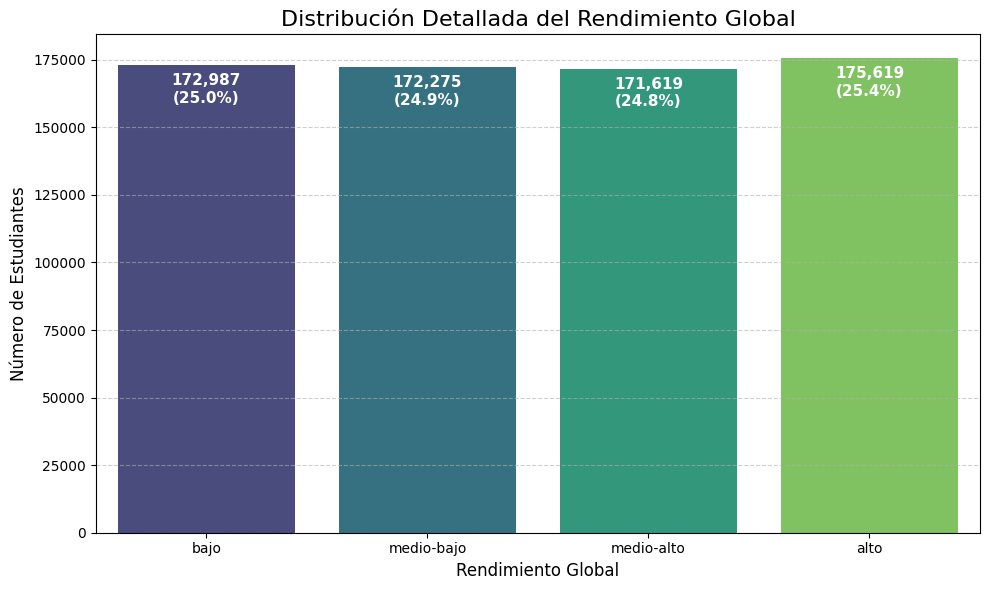

In [9]:
# Asegurar orden de categorías
orden = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Contar y calcular porcentaje
conteo = d['RENDIMIENTO_GLOBAL'].value_counts().reindex(orden)
porcentajes = (conteo / conteo.sum()) * 100

# Crear gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')

# Añadir etiquetas de conteo y porcentaje
for i, val in enumerate(conteo.values):
    ax.text(i, val - 3000, f'{val:,}\n({porcentajes[i]:.1f}%)',
            ha='center', va='top', color='white', fontsize=11, fontweight='bold')

# Títulos y estilo
plt.title('Distribución Detallada del Rendimiento Global', fontsize=16)
plt.ylabel('Número de Estudiantes', fontsize=12)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


**Analisis grafico:** Las cuatro categorías tienen proporciones muy similares (entre 24.8% y 25.4%), lo que indica una distribución casi uniforme del rendimiento global entre los estudiantes.
El 25% de los estudiantes se encuentra en la categoría “bajo”. Aunque es un cuarto del total (igual que el resto), sigue siendo una cantidad considerable de estudiantes que podrían necesitar apoyo educativo adicional.

#ACADEMICAS



Debido al gran numero de programas que hay **[ESTU_PRGM_ACADEMICO]** decidimos visualizar los dies programas de mayor rendimiento global y los 10 con peor  ya que este puede influir en el rendimiento debido a su nivel de dificultad o recursos disponibles.


<ipython-input-10-42c08ef7411e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking.values, y=ranking.index, palette="coolwarm")


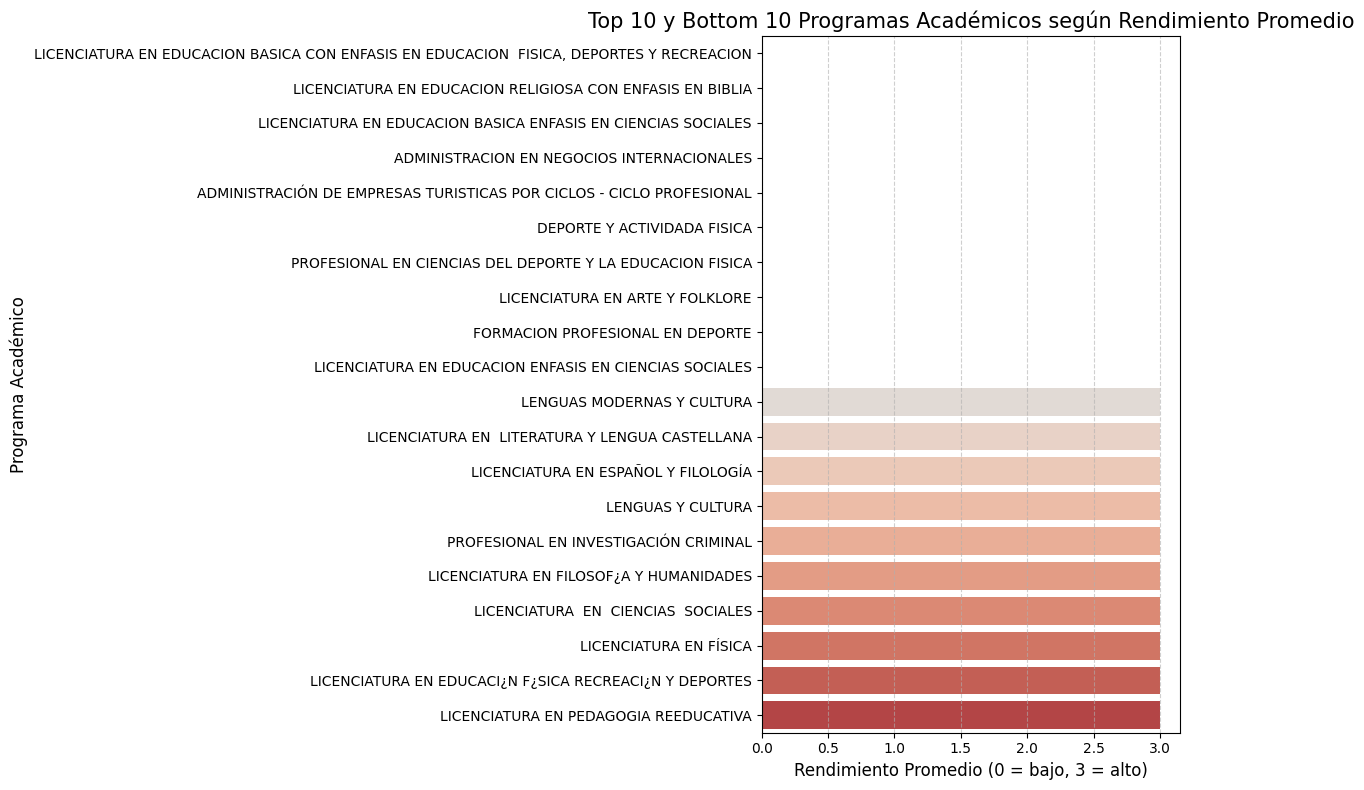

In [10]:
# Crear un diccionario para asignar un puntaje numérico a cada categoría de rendimiento
mapa_rendimiento = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

# Asignar puntaje numérico a cada fila según su rendimiento
d['RENDIMIENTO_NUM'] = d['RENDIMIENTO_GLOBAL'].map(mapa_rendimiento)

# Agrupar por programa académico y calcular promedio del rendimiento numérico
promedios = d.groupby('ESTU_PRGM_ACADEMICO')['RENDIMIENTO_NUM'].mean()

# Ordenar y seleccionar los 10 mejores y 10 peores programas
top_10 = promedios.sort_values(ascending=False).head(10)
bottom_10 = promedios.sort_values().head(10)

# Combinar en un solo DataFrame para graficar
ranking = pd.concat([top_10, bottom_10])
ranking = ranking.sort_values()  # orden para graficar mejor

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=ranking.values, y=ranking.index, palette="coolwarm")

plt.title("Top 10 y Bottom 10 Programas Académicos según Rendimiento Promedio", fontsize=15)
plt.xlabel("Rendimiento Promedio (0 = bajo, 3 = alto)", fontsize=12)
plt.ylabel("Programa Académico", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Analisis grafico:** Al comparar los programas de mejor rendimiento  con los que tienen un rendimiento promedio más bajo, observamos menor diversidad aparente de los programas de rendimiento más bajo parecen inclinarse más hacia áreas como la educación religiosa, la administración de empresas turísticas y la administración de negocios internacionales.

El departamento donde se encuentra el programa **[ESTU_PRGM_DEPARTAMENTO]** puede reflejar desigualdades educativas regionales, por ende decidimos analizar las 10 regiones donde sacaron mejor rendimiento enpromedio y las 10 regiones donde sacaron el peor promedio

<ipython-input-11-db46ccc39ed7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_dep.values, y=ranking_dep.index, palette="coolwarm")


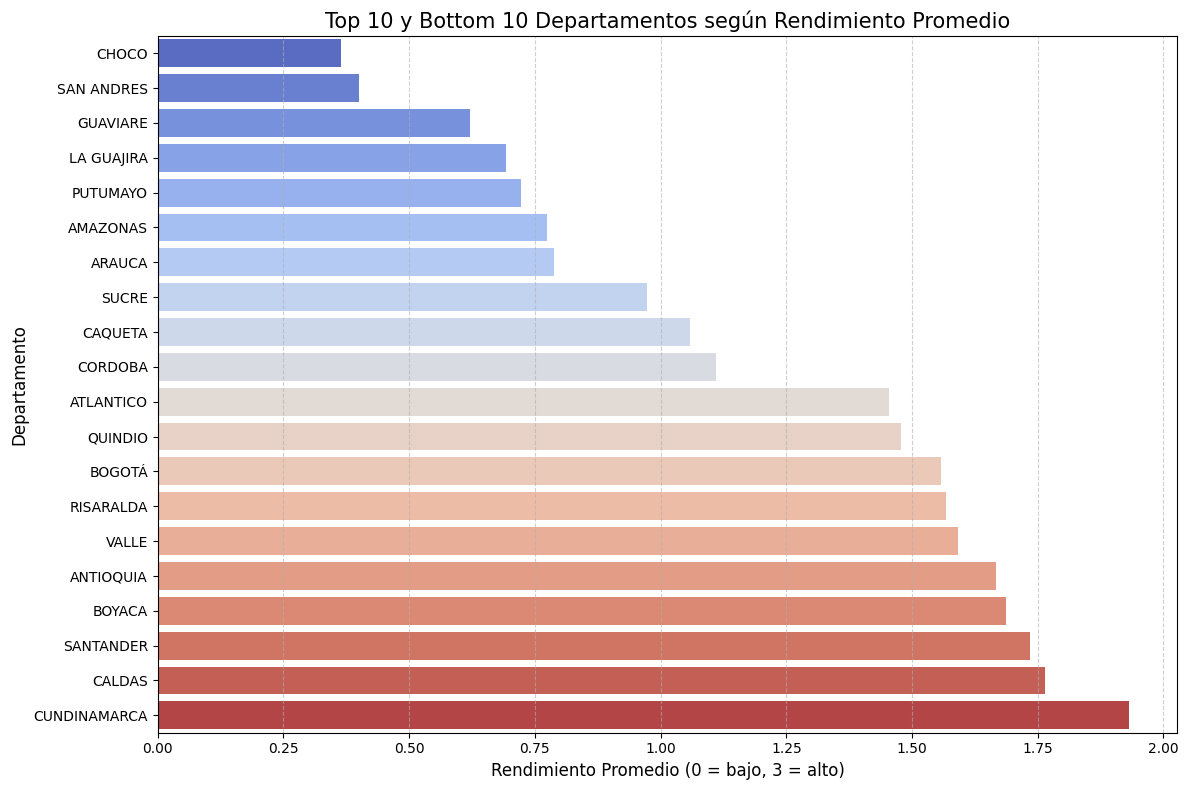

In [11]:
# Agrupar por departamento y calcular promedio del rendimiento numérico
promedios_dep = d.groupby('ESTU_PRGM_DEPARTAMENTO')['RENDIMIENTO_NUM'].mean()

# Ordenar y seleccionar los 10 mejores y 10 peores departamentos
top_10_dep = promedios_dep.sort_values(ascending=False).head(10)
bottom_10_dep = promedios_dep.sort_values().head(10)

# Combinar en un solo DataFrame para graficar
ranking_dep = pd.concat([top_10_dep, bottom_10_dep])
ranking_dep = ranking_dep.sort_values()

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=ranking_dep.values, y=ranking_dep.index, palette="coolwarm")

plt.title("Top 10 y Bottom 10 Departamentos según Rendimiento Promedio", fontsize=15)
plt.xlabel("Rendimiento Promedio (0 = bajo, 3 = alto)", fontsize=12)
plt.ylabel("Departamento", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Analisis grafico:**  La concentración de universidades de alta calidad en Cundinamarca (Bogotá), Bogotá D.C., Antioquia y Valle del Cauca podría ser un factor significativo que contribuye al mayor rendimiento promedio observado en estos departamentos. Estas instituciones atraen talento, ofrecen una educación de calidad, promueven una cultura de alto rendimiento y se desenvuelven en entornos socioeconómicos que pueden favorecer el éxito académico y profesional de sus estudiantes.

Si el estudiante paga su matrícula **[ESTU_PAGOMATRICULAPROPIO]** se puede relacionar con el compromiso o situación económica ademas de como esto afecta el rendimineto global por estudiante


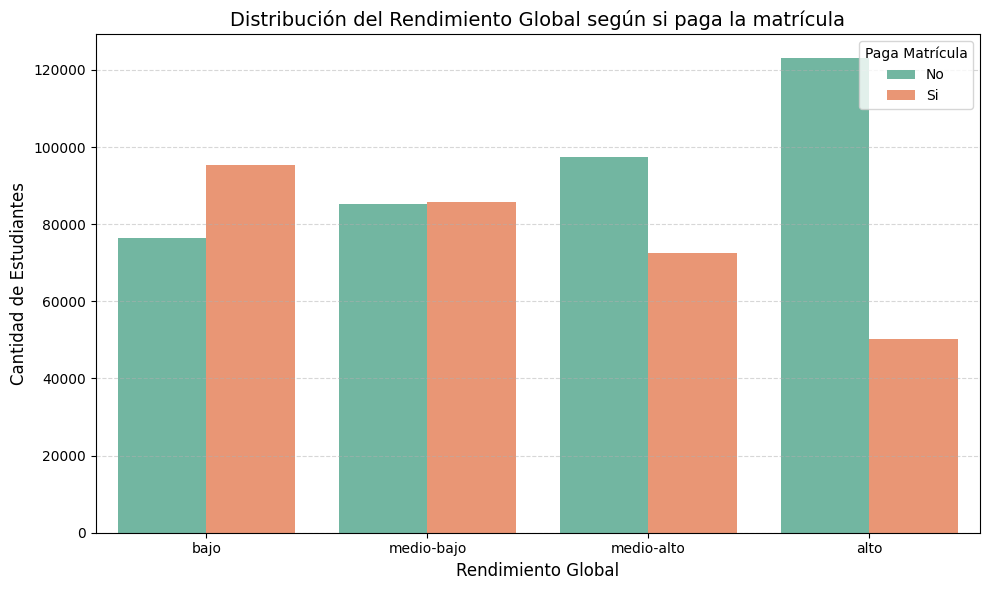

In [12]:
# Orden personalizado
orden = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

plt.figure(figsize=(10, 6))

# Gráfico de barras con orden y agrupado por si paga matrícula
sns.countplot(data=d, x='RENDIMIENTO_GLOBAL', hue='ESTU_PAGOMATRICULAPROPIO', palette='Set2', order=orden)

# Títulos y etiquetas
plt.title('Distribución del Rendimiento Global según si paga la matrícula', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Cantidad de Estudiantes', fontsize=12)
plt.legend(title='Paga Matrícula', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



**Analisis grafico:** Se observa una tendencia interesante. A medida que el rendimiento global aumenta, la proporción de estudiantes que no pagan matrícula tiende a ser mayor en comparación con los estudiantes que sí pagan matrícula.

Las universidades con matrículas **[ESTU_VALORMATRICULAUNIVERSIDAD]** más altas pueden tener más recursos educativos y esto puede afectar el rendimiento global por estudiante

<ipython-input-13-57ce3e57f250>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


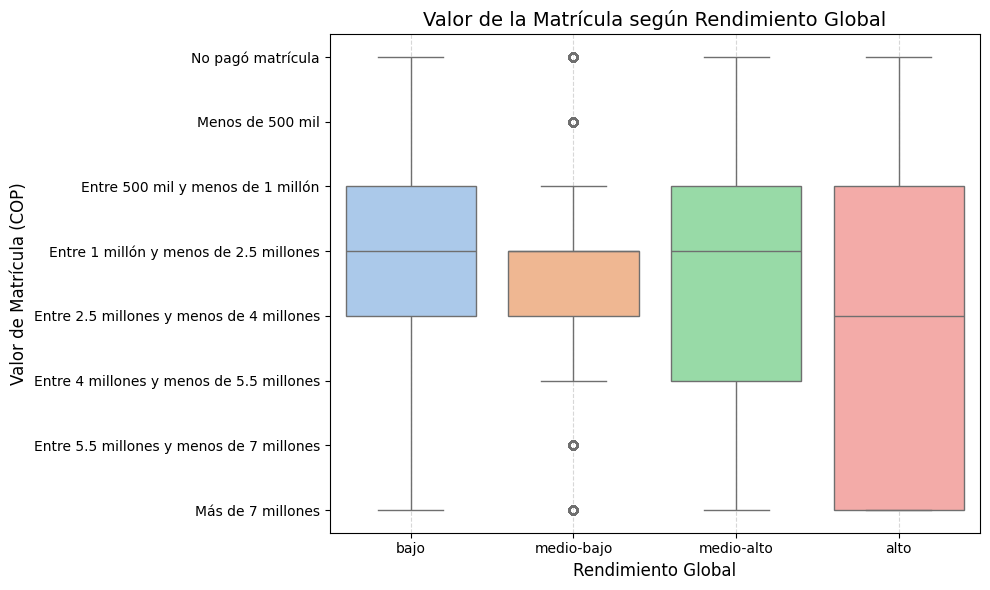

In [13]:
# Orden personalizado del valor de la matrícula
orden_matricula = [
    'No pagó matrícula',
    'Menos de 500 mil',
    'Entre 500 mil y menos de 1 millón',
    'Entre 1 millón y menos de 2.5 millones',
    'Entre 2.5 millones y menos de 4 millones',
    'Entre 4 millones y menos de 5.5 millones',
    'Entre 5.5 millones y menos de 7 millones',
    'Más de 7 millones'
]

# Convertir a tipo categórico ordenado
d['ESTU_VALORMATRICULAUNIVERSIDAD'] = pd.Categorical(
    d['ESTU_VALORMATRICULAUNIVERSIDAD'],
    categories=orden_matricula,
    ordered=True
)

# Orden para el rendimiento
orden_rendimiento = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Crear gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=d,
    x='RENDIMIENTO_GLOBAL',
    y='ESTU_VALORMATRICULAUNIVERSIDAD',
    order=orden_rendimiento,
    palette='pastel'
)

# Etiquetas y título
plt.title('Valor de la Matrícula según Rendimiento Global', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Valor de Matrícula (COP)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



**Analisis grafico:** Aunque todos los niveles de rendimiento están presentes en todos los rangos de matrícula, hay una ligera tendencia a que los estudiantes con mayores niveles de matrícula (y probablemente más recursos) tengan un rendimiento medio-alto o alto, mientras que los de menor matrícula se concentran más en bajo y medio-bajo.

Esto no implica causalidad, pero sí puede reflejar desigualdades de contexto económico y su relación con el rendimiento académico.

#laborales

Un alto número de horas trabajadas **[ESTU_HORASSEMANATRABAJA]** podría afectar negativamente el tiempo de estudio.

<ipython-input-14-eb4bd98087bc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


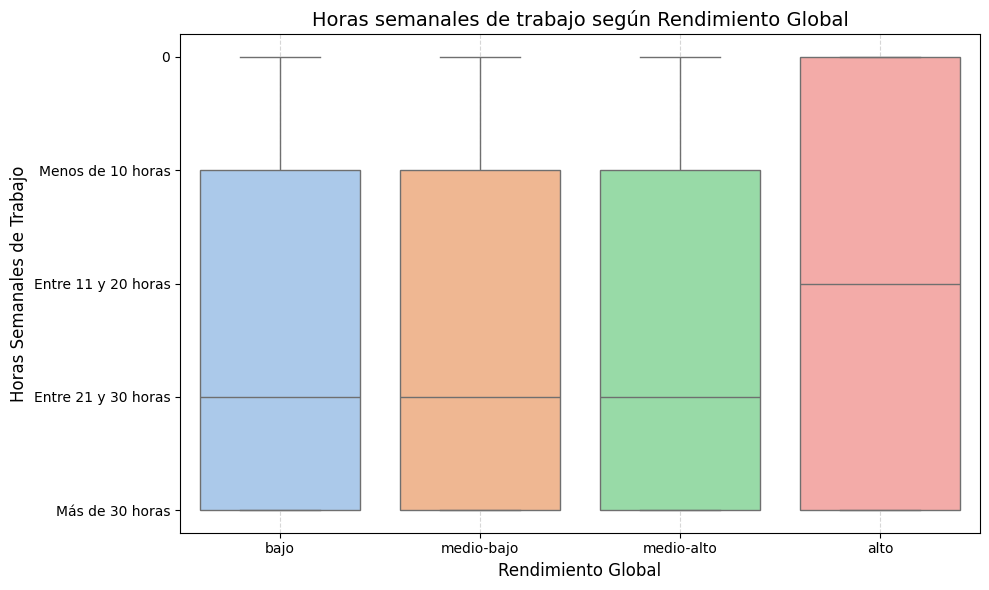

In [14]:
# Orden personalizado de las horas semanales de trabajo
orden_horas_trabajo = [
    '0',
    'Menos de 10 horas',
    'Entre 11 y 20 horas',
    'Entre 21 y 30 horas',
    'Más de 30 horas'
]

# Convertir a tipo categórico ordenado
d['ESTU_HORASSEMANATRABAJA'] = pd.Categorical(
    d['ESTU_HORASSEMANATRABAJA'],
    categories=orden_horas_trabajo,
    ordered=True
)

# Orden para el rendimiento
orden_rendimiento = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Crear gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=d,
    x='RENDIMIENTO_GLOBAL',
    y='ESTU_HORASSEMANATRABAJA',
    order=orden_rendimiento,
    palette='pastel'
)

# Etiquetas y título
plt.title('Horas semanales de trabajo según Rendimiento Global', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Horas Semanales de Trabajo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Analisis grafico:** este gráfico sugiere que los estudiantes con un rendimiento global más alto tienden a trabajar menos horas a la semana, lo que podría indicar una mayor dedicación al estudio. Por otro lado, los estudiantes con rendimiento bajo y medio-bajo muestran una mayor tendencia a trabajar más horas, lo que podría ser un factor que influye en su rendimiento académico.

#socioeconomicas

En Colombia, este indicador **[FAMI_ESTRATOVIVIENDA]** se asocia al nivel socioeconómico general, el cual puede influir en el rendimineto global de los estudiantes debidos al acceso de recurso que puedan tener.


<ipython-input-15-37d5a6611020>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


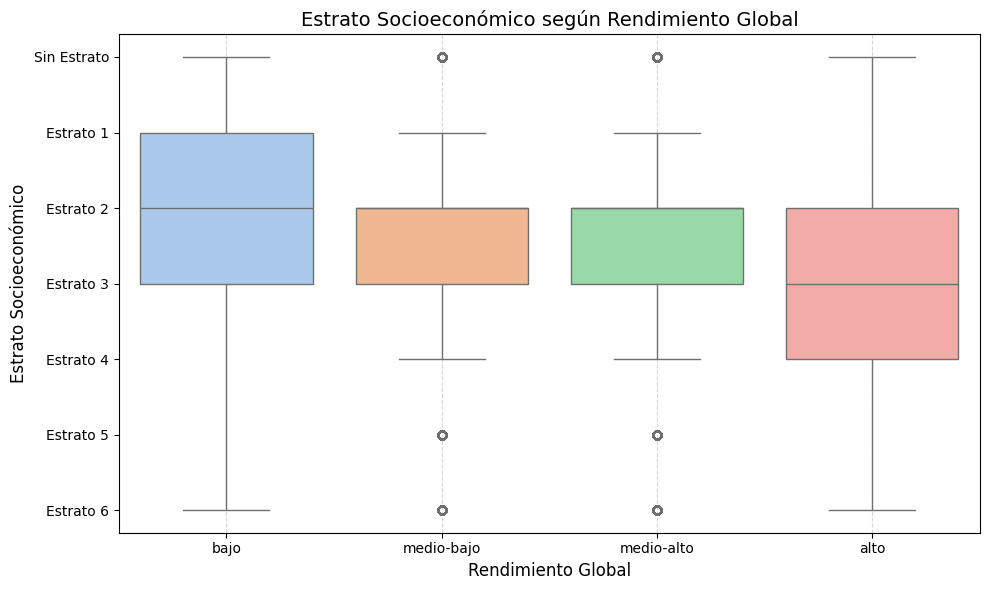

In [15]:
# Orden personalizado para el estrato de vivienda
orden_estrato = [
    'Sin Estrato',
    'Estrato 1',
    'Estrato 2',
    'Estrato 3',
    'Estrato 4',
    'Estrato 5',
    'Estrato 6'
]

# Convertir a tipo categórico ordenado
d['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(
    d['FAMI_ESTRATOVIVIENDA'],
    categories=orden_estrato,
    ordered=True
)

# Orden para el rendimiento
orden_rendimiento = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Crear gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=d,
    x='RENDIMIENTO_GLOBAL',
    y='FAMI_ESTRATOVIVIENDA',
    order=orden_rendimiento,
    palette='pastel'
)

# Etiquetas y título
plt.title('Estrato Socioeconómico según Rendimiento Global', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Estrato Socioeconómico', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Analisis grafico:** Este gráfico sugiere una ligera tendencia a que un mayor rendimiento global esté asociado con un estrato socioeconómico más alto, aunque esta relación no es estricta y existe una variabilidad considerable.

 La falta de acceso a internet **[FAMI_TIENEINTERNET]** limita oportunidades y puede generar desventajas significativas en el rendimiento académico y profesional.


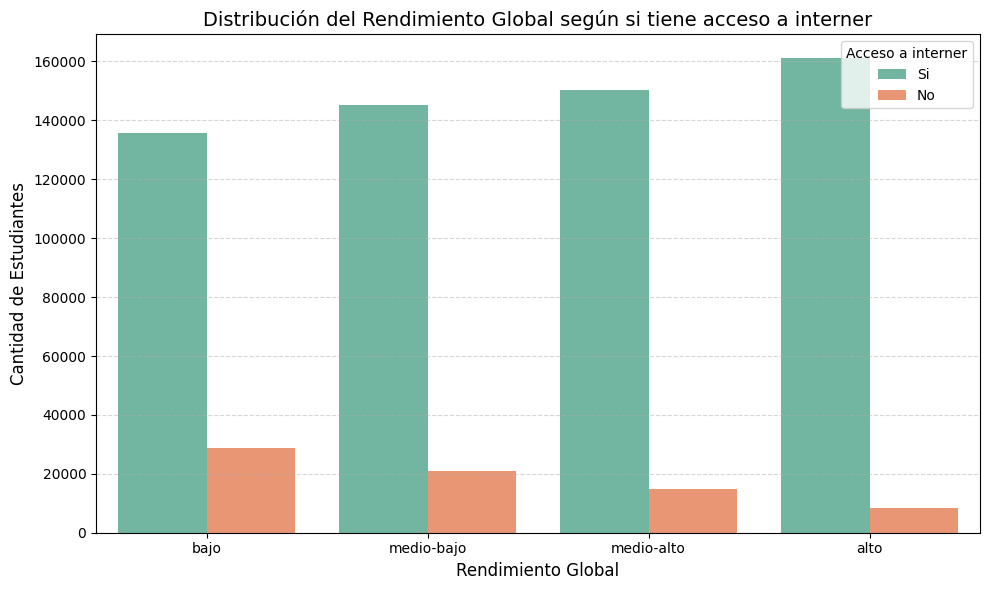

In [16]:
# Orden personalizado
orden = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

plt.figure(figsize=(10, 6))

# Gráfico de barras con orden y agrupado por si paga matrícula
sns.countplot(data=d, x='RENDIMIENTO_GLOBAL', hue='FAMI_TIENEINTERNET', palette='Set2', order=orden)

# Títulos y etiquetas
plt.title('Distribución del Rendimiento Global según si tiene acceso a interner', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Cantidad de Estudiantes', fontsize=12)
plt.legend(title='Acceso a interner', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Analisis grafico:** El acceso a internet está asociado a una mayor cantidad de estudiantes en categorías de rendimiento más alto, los estudiantes sin acceso a internet predominan en las categorías de rendimiento bajo y disminuyen conforme el rendimiento aumenta.

Esto sugiere que el acceso a internet podría estar relacionado positivamente con un mejor rendimiento académico

El acceso a un computador **[FAMI_TIENECOMPUTADOR]** puede facilitar herramientas y la preparación academica por estudiante.

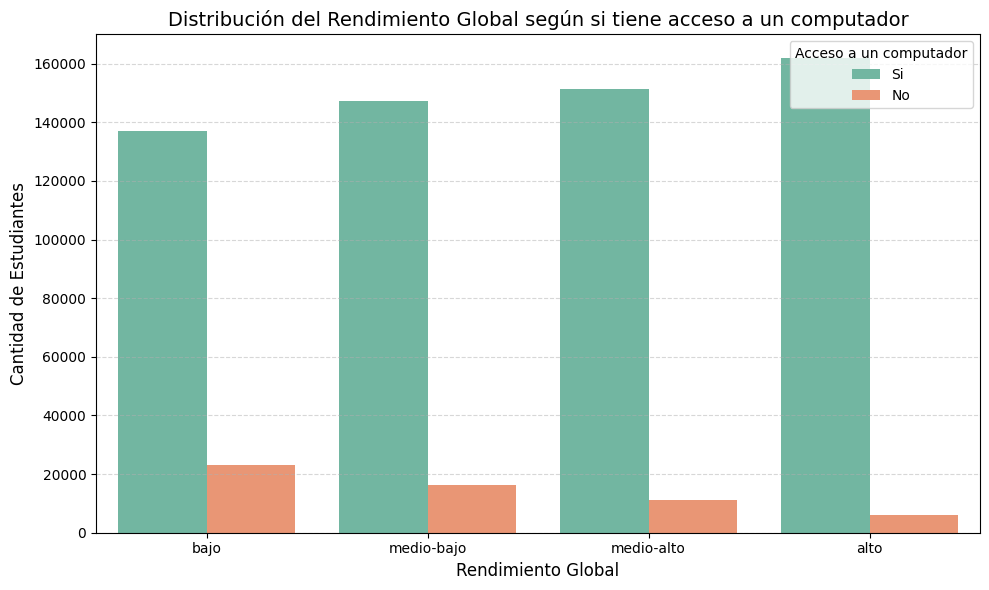

In [17]:
# Orden personalizado
orden = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

plt.figure(figsize=(10, 6))

# Gráfico de barras con orden y agrupado por si paga matrícula
sns.countplot(data=d, x='RENDIMIENTO_GLOBAL', hue='FAMI_TIENECOMPUTADOR', palette='Set2', order=orden)

# Títulos y etiquetas
plt.title('Distribución del Rendimiento Global según si tiene acceso a un computador', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Cantidad de Estudiantes', fontsize=12)
plt.legend(title='Acceso a un computador', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Analisis grafico:** El acceso a un computador está positivamente relacionado con el rendimiento académico de los estudiantes en esta muestra. Aquellos con acceso tienen más probabilidades de ubicarse en los niveles más altos de rendimiento, mientras que quienes no tienen acceso tienden a concentrarse en los niveles bajos.

El acceso a una lavadora **[FAMI_TIENELAVADORA]** aunque indirecto, puede ser un proxy del nivel de vida.

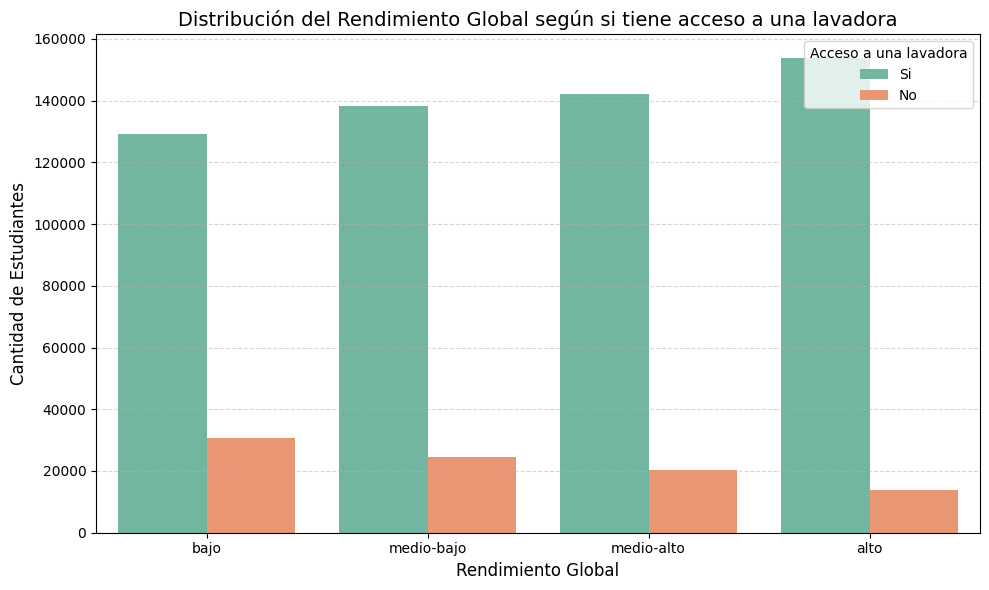

In [18]:
# Orden personalizado
orden = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

plt.figure(figsize=(10, 6))

# Gráfico de barras con orden y agrupado por si paga matrícula
sns.countplot(data=d, x='RENDIMIENTO_GLOBAL', hue='FAMI_TIENELAVADORA', palette='Set2', order=orden)

# Títulos y etiquetas
plt.title('Distribución del Rendimiento Global según si tiene acceso a una lavadora', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Cantidad de Estudiantes', fontsize=12)
plt.legend(title='Acceso a una lavadora', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Analisis grafico:** los estudiantes con acceso a una lavadora en casa tienden a tener un rendimiento global más alto, y esta diferencia es más marcada en los niveles de rendimiento más altos. Esto podría estar relacionado con factores socioeconómicos más amplios que influyen en el rendimiento académico.

 Padres con mayor educación **[FAMI_EDUCACIONPADRE]** tienden a fomentar más la lectura, el diálogo, la curiosidad y pueden ofrecer mejor guía y recursos para el aprendizaje de sus hijos.

<ipython-input-21-37fb657a00d7>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


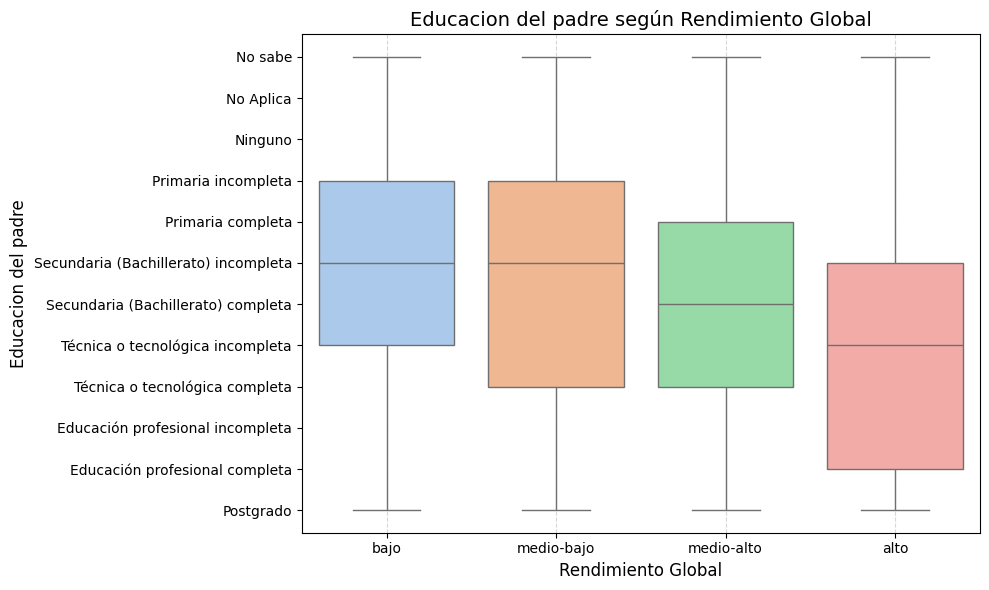

In [21]:
# Orden personalizado para el estrato de vivienda
orden_estrato = [
'No sabe',
'No Aplica',
'Ninguno',
'Primaria incompleta',
'Primaria completa',
'Secundaria (Bachillerato) incompleta',
'Secundaria (Bachillerato) completa',
'Técnica o tecnológica incompleta',
'Técnica o tecnológica completa',
'Educación profesional incompleta',
'Educación profesional completa',
'Postgrado'
]






# Convertir a tipo categórico ordenado
d['FAMI_EDUCACIONPADRE'] = pd.Categorical(
    d['FAMI_EDUCACIONPADRE'],
    categories=orden_estrato,
    ordered=True
)

# Orden para el rendimiento
orden_rendimiento = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Crear gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=d,
    x='RENDIMIENTO_GLOBAL',
    y='FAMI_EDUCACIONPADRE',
    order=orden_rendimiento,
    palette='pastel'
)

# Etiquetas y título
plt.title('Educacion del padre según Rendimiento Global', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Educacion del padre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Analisis grafico:** Si bien estudiantes de todos los niveles educativos del padre pueden encontrarse en todas las categorías de rendimiento, la tendencia general indica que un mayor nivel educativo paterno se relaciona con un mejor rendimiento estudiantil.

Madres con mayor educación **[FAMI_EDUCACIONMADRE]** tienden a fomentar más la lectura, el diálogo, la curiosidad y pueden ofrecer mejor guía y recursos para el aprendizaje de sus hijos


<ipython-input-22-db1334fedb07>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


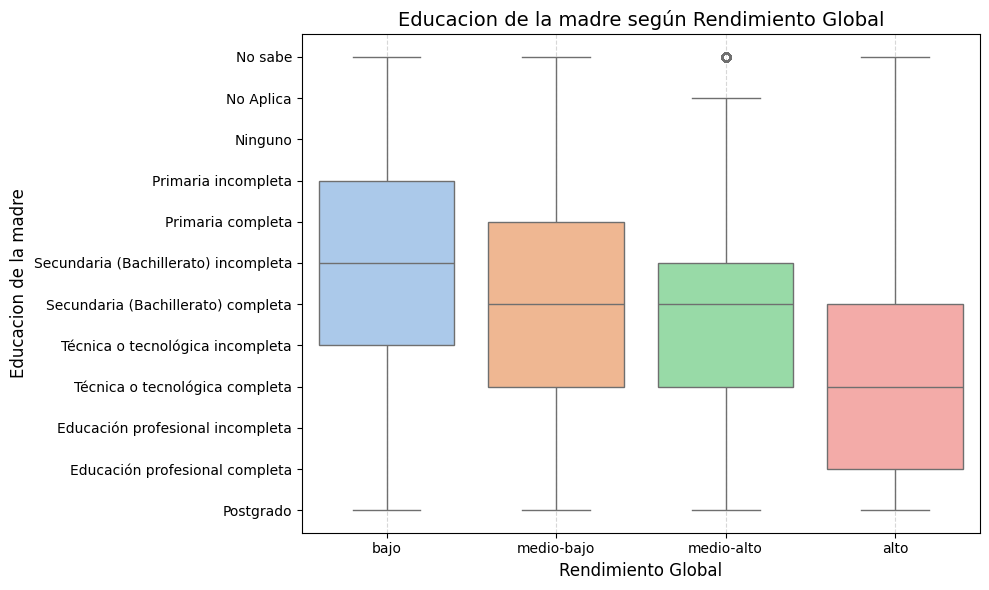

In [22]:
# Orden personalizado para el estrato de vivienda
orden_estrato = [
'No sabe',
'No Aplica',
'Ninguno',
'Primaria incompleta',
'Primaria completa',
'Secundaria (Bachillerato) incompleta',
'Secundaria (Bachillerato) completa',
'Técnica o tecnológica incompleta',
'Técnica o tecnológica completa',
'Educación profesional incompleta',
'Educación profesional completa',
'Postgrado'
]






# Convertir a tipo categórico ordenado
d['FAMI_EDUCACIONMADRE'] = pd.Categorical(
    d['FAMI_EDUCACIONMADRE'],
    categories=orden_estrato,
    ordered=True
)

# Orden para el rendimiento
orden_rendimiento = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Crear gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=d,
    x='RENDIMIENTO_GLOBAL',
    y='FAMI_EDUCACIONMADRE',
    order=orden_rendimiento,
    palette='pastel'
)

# Etiquetas y título
plt.title('Educacion de la madre según Rendimiento Global', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Educacion de la madre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Analisis grafico:** este gráfico refuerza la idea de que el nivel educativo de los padres, en este caso específico de la madre, está positivamente asociado con el rendimiento global de los estudiantes. Un mayor nivel educativo materno tiende a correlacionarse con un mejor rendimiento académico.

#Condiciones especiales

Los estudiantes privados de la libertad **[ESTU_PRIVADO_LIBERTAD]** pueden enfrentar limitaciones significativas para estudiar.

<ipython-input-26-c1e66961039b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=privados_libertad, x='RENDIMIENTO_GLOBAL', palette='Set2', order=orden)


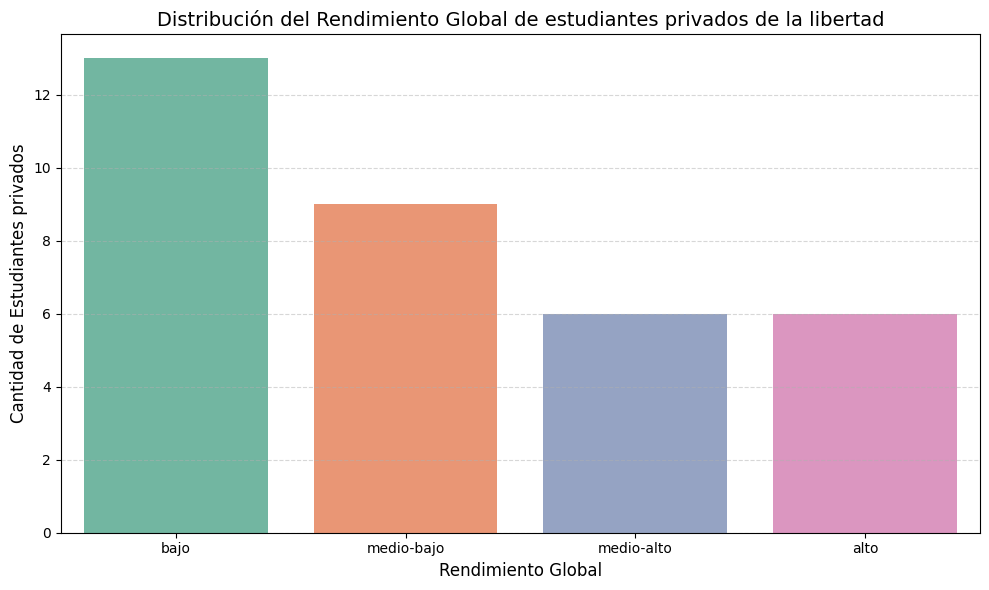

In [26]:
# Filtrar solo estudiantes privados de la libertad
privados_libertad = d[d['ESTU_PRIVADO_LIBERTAD'] == 'S']

# Orden personalizado
orden = ['bajo', 'medio-bajo', 'medio-alto', 'alto']

# Gráfico de barras para estudiantes privados de la libertad
plt.figure(figsize=(10, 6))
sns.countplot(data=privados_libertad, x='RENDIMIENTO_GLOBAL', palette='Set2', order=orden)

# Títulos y etiquetas
plt.title('Distribución del Rendimiento Global de estudiantes privados de la libertad', fontsize=14)
plt.xlabel('Rendimiento Global', fontsize=12)
plt.ylabel('Cantidad de Estudiantes privados', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Analisis grafico:** la mayoría de los estudiantes privados de la libertad en esta muestra tienen un rendimiento global bajo, y la cantidad disminuye a medida que el rendimiento aumenta. Esto subraya la importancia de comprender y abordar los factores que influyen en la educación de esta población.